## MA Model

#### - Generate your own MA process
#### - Use ACF and PACF to determine order of MA process
#### - Build the model
#### - Make predictions

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

### Generate Some Data


Y_t = 50 + 0.4e_t-1 + 0.3e_t-2 +e_t                                                                                 
e_t ~ N(0,1)

In [52]:
errors = np.random.normal(0, 1, 400)

In [53]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020') # 4 months of data

In [54]:
mu = 50
series = []
for t in range(1,len(date_index)+1): 
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [55]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

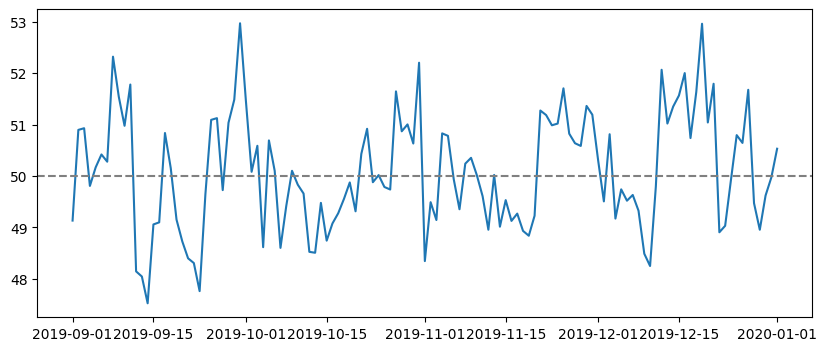

In [56]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [57]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

### ACF

<BarContainer object of 10 artists>

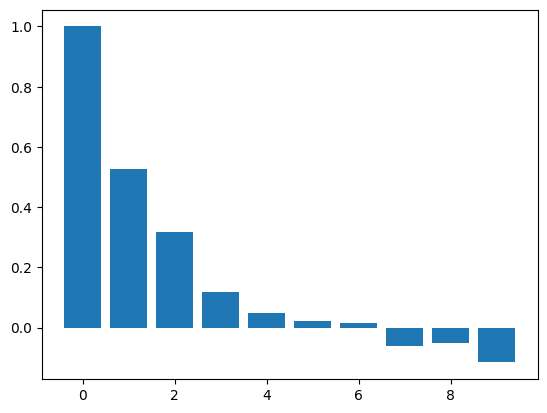

In [58]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

### PACF

<BarContainer object of 21 artists>

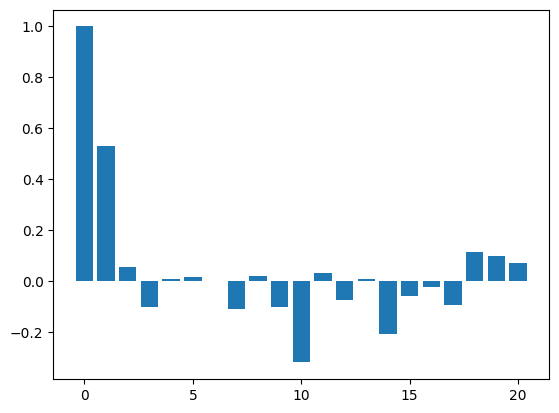

In [59]:
pacf_vals = pacf(series)
num_lags = len(pacf_vals)
plt.bar(range(num_lags), pacf_vals[:num_lags])

Decaying PACF plot indicates MA Process

### Get training and testing sets

In [60]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end] # 2019-12-31 to 2020-1-1 (2 days)

### Fit ARIMA Model


In [61]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

MA(lag=2) model can only predict 2 periods into the future, after which model will return the constant mean of 50

In [62]:
#fit the model
model_fit = model.fit()

In [63]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -166.589
Date:                Mon, 21 Oct 2024   AIC                            341.177
Time:                        03:42:08   BIC                            352.361
Sample:                    09-01-2019   HQIC                           345.719
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0787      0.160    313.899      0.000      49.766      50.391
ma.L1          0.4715      0.087      5.432      0.000       0.301       0.642
ma.L2          0.2989      0.096      3.101      0.0

#### Predicted Model:
##### y^_t = 50 + 0.47e_t-1 + 0.29e_t-2
predicted model has coefficients very close to the actual model

In [64]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [65]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date) # 2019-12-31 to 2020-1-1 (2 days)

The future values depend heavily on the error terms of the past two periods since we are using MA(2) model for prediction

In [66]:
residuals = test_data - predictions

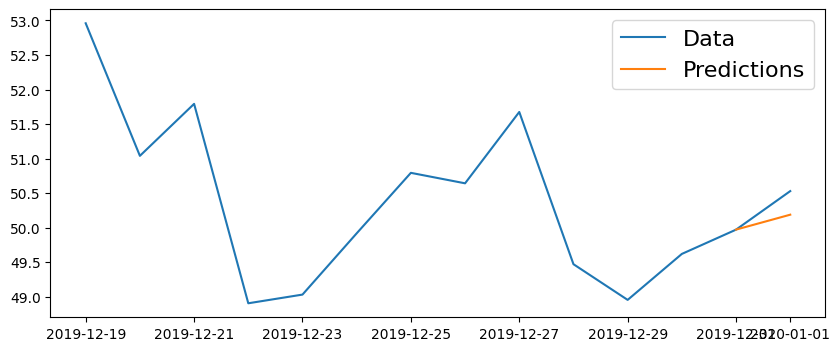

In [67]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:]) # past 14 days actual data
plt.plot(predictions) # prediction of 2 days in the future for MA(2) model

plt.legend(('Data', 'Predictions'), fontsize=16)

In [68]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))


Mean Absolute Percent Error: 0.0034


In [69]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 0.2416440183246474
